##### Analyse Cleaned Datasets

In [2]:
import sys
sys.path.append("..")  # go back one folder

from main import run_summary

df = run_summary()


Dataset  Jumlah Atribut  Jumlah Instance  Jumlah Defective  Jumlah Tidak Defective Nama File
    CM1              37              327                42                     285  CM1.arff
    JM1              21             7720              1612                    6108  JM1.arff
    KC1              21             1162               294                     868  KC1.arff
    KC3              39              194                36                     158  KC3.arff
    KC4               0                0                 0                       0  KC4.arff
    MC1              38             1952                36                    1916  MC1.arff
    MC2              39              124                44                      80  MC2.arff
    MW1              37              250                25                     225  MW1.arff
    PC1              37              679                55                     624  PC1.arff
    PC2              36              722                16            

##### Combine Datasets on the same Attributes

In [3]:
from main import merge_datasets

merged = merge_datasets()
merged.head()



CM1.arff includes label column: defective → renamed to 'defective'
JM1.arff includes label column: label → renamed to 'defective'
KC1.arff includes label column: defective → renamed to 'defective'
KC3.arff includes label column: defective → renamed to 'defective'
⚠️ Skipping KC4.arff — too few columns (1)
MC1.arff includes label column: defective → renamed to 'defective'
MC2.arff includes label column: defective → renamed to 'defective'
MW1.arff includes label column: defective → renamed to 'defective'
PC1.arff includes label column: defective → renamed to 'defective'
PC2.arff includes label column: defective → renamed to 'defective'
PC3.arff includes label column: defective → renamed to 'defective'
PC4.arff includes label column: defective → renamed to 'defective'
PC5.arff includes label column: defective → renamed to 'defective'
✅ Final common columns: ['branch_count', 'cyclomatic_complexity', 'defective', 'design_complexity', 'essential_complexity', 'halstead_content', 'halstead_dif

,halstead_level,loc_comments,halstead_volume,halstead_effort,loc_code_and_comment,num_unique_operators,cyclomatic_complexity,loc_total,num_unique_operands,halstead_content,...,design_complexity,halstead_prog_time,num_operands,essential_complexity,halstead_length,branch_count,halstead_difficulty,halstead_error_est,num_operators,loc_executable
0,0.23,8.0,51.89,227.03,0.0,7.0,2.0,9.0,4.0,11.86,...,1.0,12.61,5.0,1.0,15.0,3.0,4.38,0.02,10.0,9.0
1,0.08,2.0,130.80,1569.59,2.0,12.0,2.0,13.0,5.0,10.90,...,1.0,87.20,10.0,1.0,32.0,3.0,12.00,0.04,22.0,11.0
2,0.02,70.0,2414.97,99929.77,5.0,32.0,18.0,109.0,58.0,58.36,...,7.0,5551.65,150.0,13.0,372.0,35.0,41.38,0.80,222.0,104.0
3,0.08,12.0,745.80,9840.36,0.0,19.0,4.0,41.0,36.0,56.52,...,3.0,546.69,50.0,3.0,129.0,7.0,13.19,0.25,79.0,41.0
4,0.07,22.0,484.48,6655.21,14.0,18.0,8.0,41.0,19.0,35.27,...,6.0,369.73,29.0,4.0,93.0,15.0,13.74,0.16,64.0,27.0


Didapatkan 21 kolom yang sama.

##### Exploratory Data Analysis (EDA)

Number of Instance dan Label Distribution

In [4]:
print("Jumlah total instance:", len(merged))
print("\nDistribusi label 'defective':")
print(merged['defective'].value_counts())
print("\nProporsi:")
print(merged['defective'].value_counts(normalize=True))


Jumlah total instance: 17147

Distribusi label 'defective':
defective
0    14223
1     2924
Name: count, dtype: int64

Proporsi:
defective
0    0.829475
1    0.170525
Name: proportion, dtype: float64


Describe Feature Statistic

In [5]:
merged.describe()


,halstead_level,loc_comments,halstead_volume,halstead_effort,loc_code_and_comment,num_unique_operators,cyclomatic_complexity,loc_total,num_unique_operands,halstead_content,...,design_complexity,halstead_prog_time,num_operands,essential_complexity,halstead_length,branch_count,halstead_difficulty,halstead_error_est,num_operators,loc_executable
count,17147.000000,17147.000000,17147.000000,1.714700e+04,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,...,17147.000000,1.714700e+04,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000
mean,0.121709,5.648743,932.634133,5.189755e+04,1.880795,13.334811,6.338893,40.143465,21.258471,38.939276,...,3.963259,2.883197e+03,61.801773,3.073366,152.703738,11.356214,17.469136,0.310877,90.901965,32.280982
std,0.136436,19.598081,3446.786075,5.408770e+05,8.097088,8.672041,12.993317,84.997364,36.219515,134.775064,...,8.265775,3.004872e+04,158.501992,6.848112,406.148004,23.569598,21.648137,1.148952,250.045319,76.994408
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000e+00,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050000,0.000000,132.000000,9.382300e+02,0.000000,8.000000,2.000000,11.000000,7.000000,16.400000,...,1.000000,5.212000e+01,13.000000,1.000000,32.000000,3.000000,6.750000,0.040000,19.000000,8.000000
50%,0.080000,0.000000,320.430000,3.900840e+03,0.000000,12.000000,3.000000,21.000000,14.000000,26.190000,...,2.000000,2.167100e+02,27.000000,1.000000,68.000000,5.000000,12.000000,0.110000,40.000000,16.000000
75%,0.140000,5.000000,780.440000,1.580891e+04,1.000000,17.000000,7.000000,41.000000,25.000000,42.660000,...,4.000000,8.782700e+02,60.000000,3.000000,146.000000,12.000000,21.380000,0.260000,87.000000,33.000000
max,2.000000,901.000000,174650.290000,3.115982e+07,558.000000,411.000000,470.000000,3442.000000,2241.000000,14763.910000,...,402.000000,1.731101e+06,5169.000000,290.000000,15682.000000,826.000000,833.780000,58.220000,10862.000000,2824.000000


Feature Correlation Heatmap

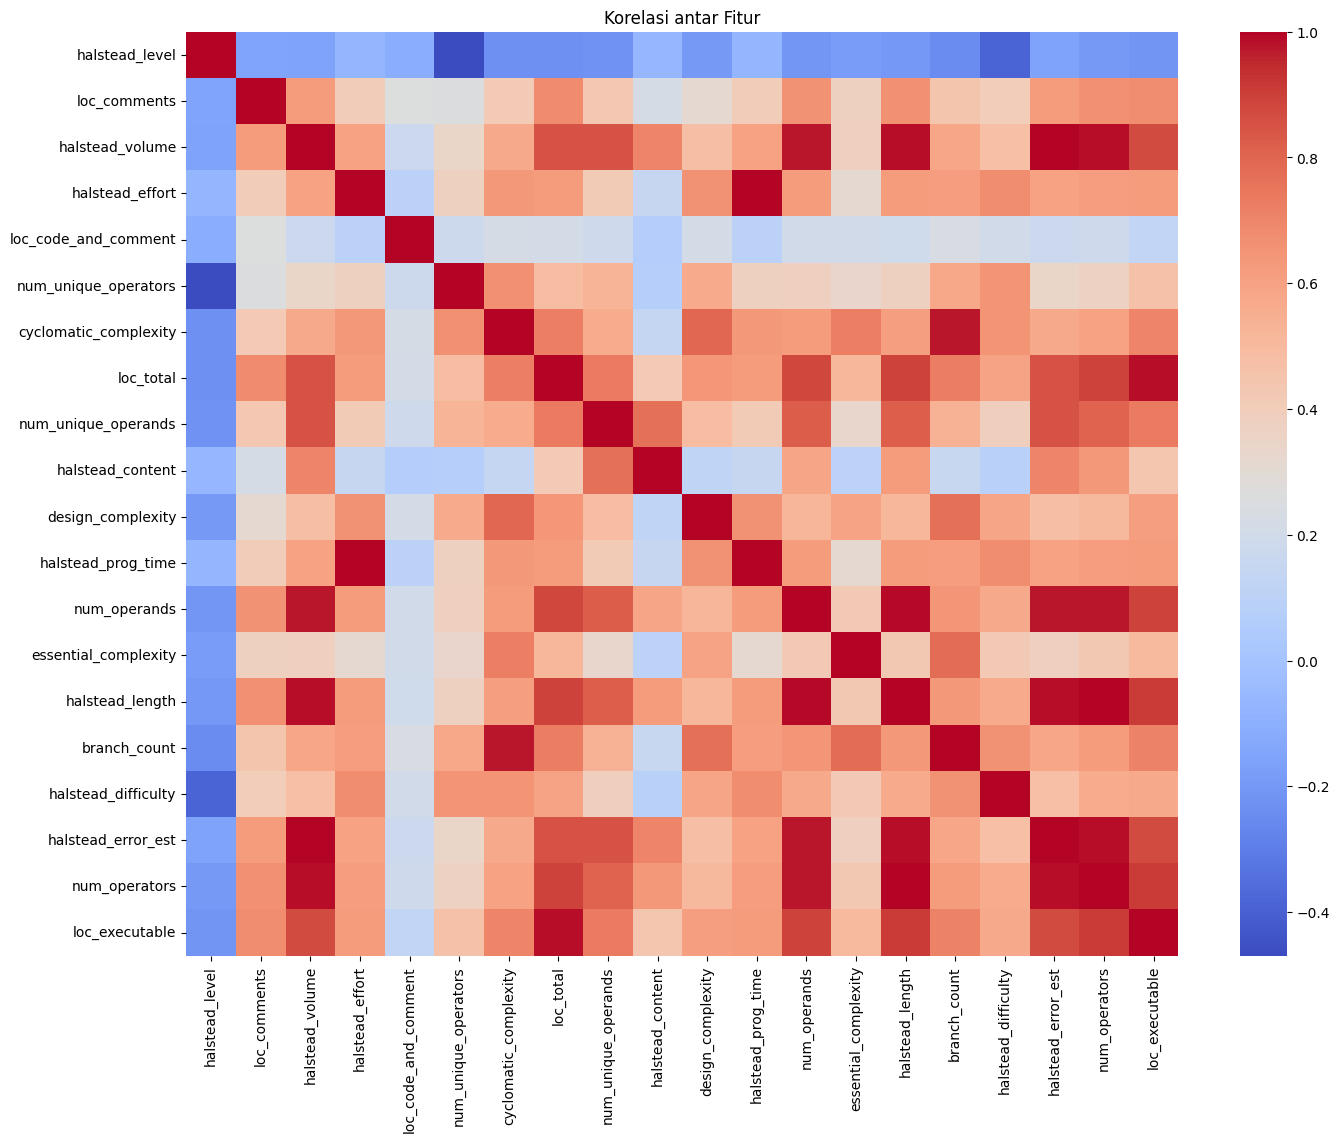

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(merged.drop(columns=["defective"]).corr(), cmap="coolwarm", annot=False)
plt.title("Korelasi antar Fitur")
plt.show()

Feature Correlation to Defective Label

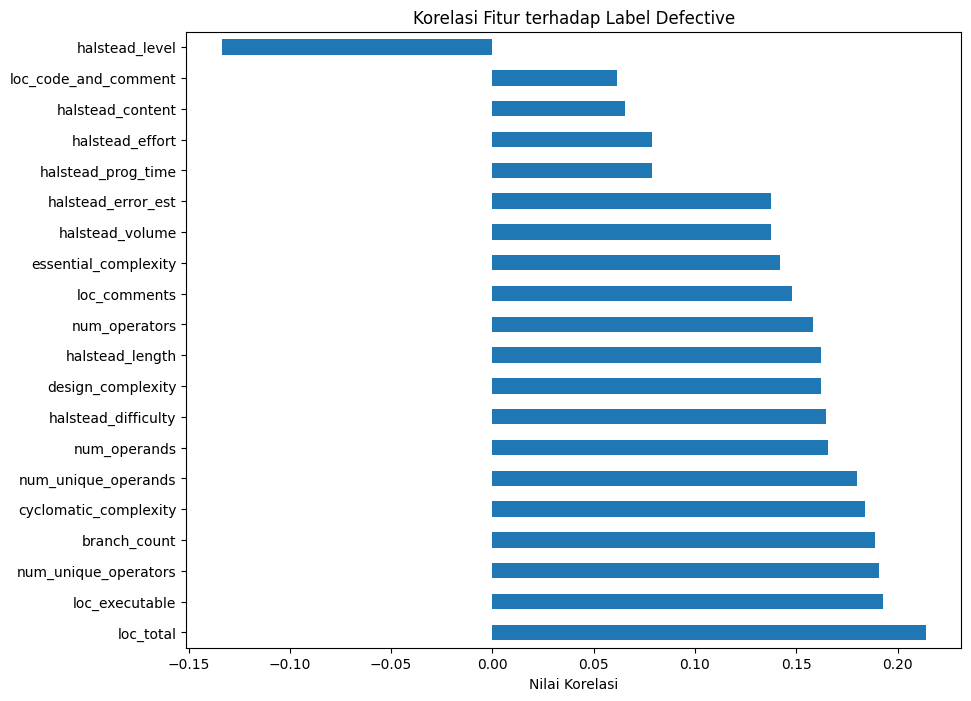

In [7]:
label_corr = merged.corr()["defective"].drop("defective").sort_values(ascending=False)
label_corr.plot(kind="barh", figsize=(10, 8), title="Korelasi Fitur terhadap Label Defective")
plt.xlabel("Nilai Korelasi")
plt.show()

##### Oversampling

Imports

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Separate Feature and Defective Label

In [9]:
X = merged.drop(columns=["defective"])
y = merged["defective"]

Oversampling with SMOTE

In [10]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [11]:
print("Sebelum Oversampling:")
print(y.value_counts())

print("\nSetelah Oversampling:")
print(pd.Series(y_resampled).value_counts())


Sebelum Oversampling:
defective
0    14223
1     2924
Name: count, dtype: int64

Setelah Oversampling:
defective
0    14223
1    14223
Name: count, dtype: int64


Visualization

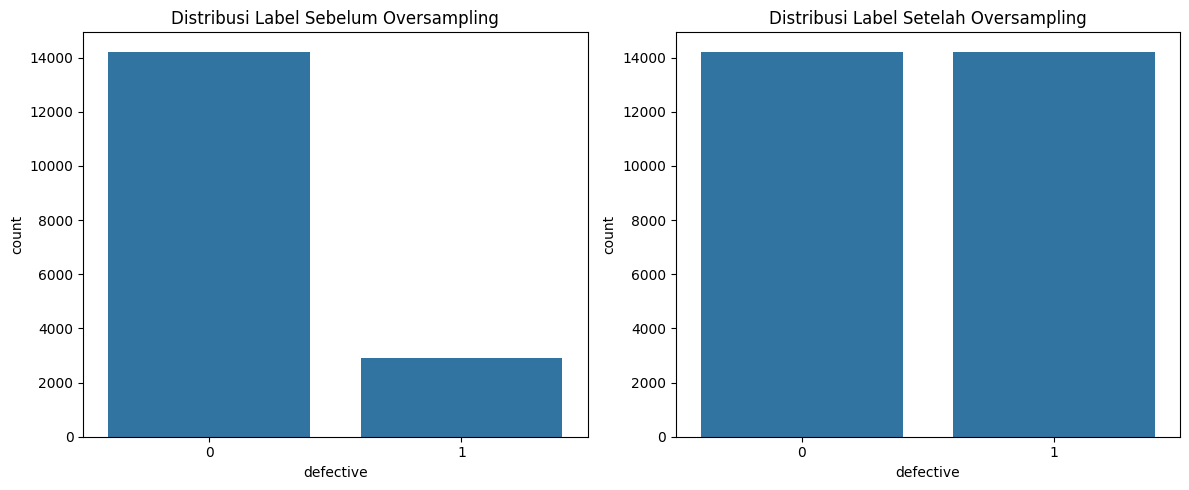

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y, ax=ax[0])
ax[0].set_title("Distribusi Label Sebelum Oversampling")

sns.countplot(x=y_resampled, ax=ax[1])
ax[1].set_title("Distribusi Label Setelah Oversampling")

plt.tight_layout()
plt.show()


Store the Results

In [13]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["defective"] = y_resampled


##### Normalization

Normalization with Standard Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_resampled.drop(columns=['defective']))

# Simpan label
y_scaled = df_resampled['defective']


In [15]:
# Konversi kembali ke DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=df_resampled.drop(columns=['defective']).columns)

# Tampilkan beberapa baris pertama
X_scaled_df.head()


,halstead_level,loc_comments,halstead_volume,halstead_effort,loc_code_and_comment,num_unique_operators,cyclomatic_complexity,loc_total,num_unique_operands,halstead_content,design_complexity,halstead_prog_time,num_operands,essential_complexity,halstead_length,branch_count,halstead_difficulty,halstead_error_est,num_operators,loc_executable
0,1.047053,-0.006759,-0.302999,-0.136603,-0.295058,-0.748829,-0.372014,-0.416458,-0.545704,-0.288966,-0.388964,-0.136603,-0.394964,-0.334378,-0.379866,-0.396302,-0.659209,-0.301091,-0.367712,-0.355275
1,-0.208531,-0.233288,-0.284693,-0.134515,-0.034387,-0.269501,-0.372014,-0.381048,-0.521814,-0.297078,-0.388964,-0.134515,-0.370412,-0.334378,-0.347081,-0.396302,-0.350996,-0.287172,-0.329849,-0.335739
2,-0.710764,2.334043,0.245198,0.018441,0.356619,1.647814,0.553284,0.468790,0.744315,0.103964,0.173382,0.018441,0.317064,1.029895,0.308618,0.635905,0.837362,0.241745,0.301198,0.572709
3,-0.208531,0.144260,-0.142023,-0.121653,-0.295058,0.401559,-0.256352,-0.133178,0.218752,0.088416,-0.201515,-0.121653,-0.173990,-0.106999,-0.160014,-0.267276,-0.302863,-0.141024,-0.150001,-0.042691
4,-0.292236,0.521809,-0.202645,-0.126606,1.529636,0.305694,-0.025027,-0.133178,-0.187365,-0.091149,0.079657,-0.126607,-0.277111,0.006690,-0.229441,-0.009224,-0.280617,-0.203659,-0.197329,-0.179447


##### PCA

PCA with Maximum Component

In [16]:
from sklearn.decomposition import PCA

# Jumlah maksimum komponen = jumlah fitur
pca = PCA(n_components=X_scaled.shape[1])
X_pca = pca.fit_transform(X_scaled)


Cumulative Explained Variance

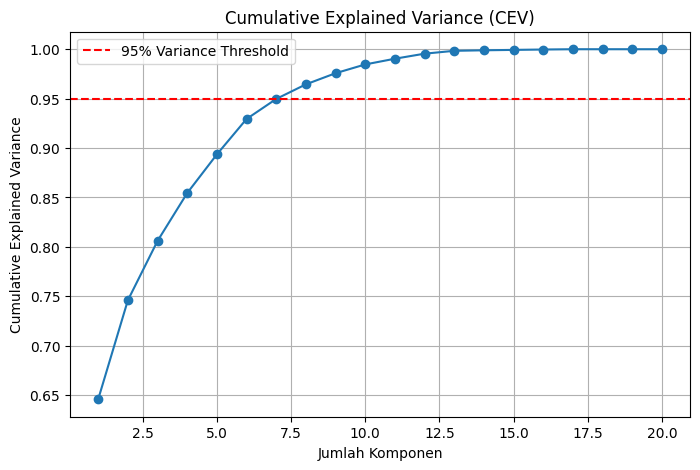

In [17]:
import numpy as np
import matplotlib.pyplot as plt

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.title('Cumulative Explained Variance (CEV)')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()


Variance Comparison

In [18]:
pca_variance_df = pd.DataFrame({
    'Komponen ke-': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Variance': explained_variance
})

pca_variance_df.head(10)  # Atau print semua


,Komponen ke-,Explained Variance Ratio,Cumulative Variance
0,PC1,0.645842,0.645842
1,PC2,0.100147,0.745989
2,PC3,0.060022,0.806011
3,PC4,0.048446,0.854457
4,PC5,0.039115,0.893572
5,PC6,0.035827,0.929399
6,PC7,0.020271,0.949671
7,PC8,0.014775,0.964445
8,PC9,0.011279,0.975724
9,PC10,0.008871,0.984595


10 Components for Classification Later

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Split dulu
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, stratify=y_scaled, random_state=42
)

# Fit PCA hanya di training
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_raw)

# Transform testing pakai PCA dari training
X_test_pca = pca.transform(X_test_raw)



PC1 and PC2 Visualization

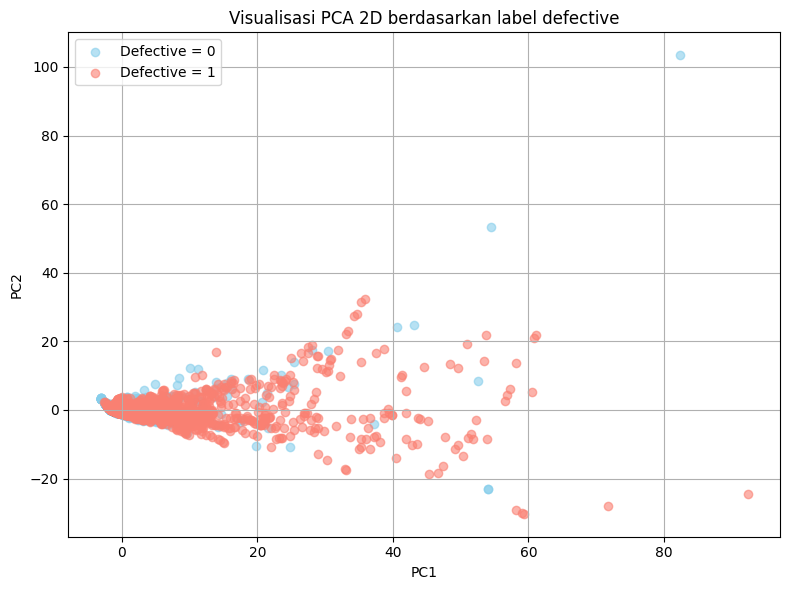

In [20]:
import matplotlib.pyplot as plt

# Ambil hanya dua komponen pertama dari PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Buat DataFrame untuk visualisasi
pca_2d_df = pd.DataFrame(data=X_pca_2d, columns=["PC1", "PC2"])
pca_2d_df["defective"] = y_scaled.values

# Scatter plot
plt.figure(figsize=(8, 6))
colors = {0: 'skyblue', 1: 'salmon'}

for label in [0, 1]:
    subset = pca_2d_df[pca_2d_df["defective"] == label]
    plt.scatter(subset["PC1"], subset["PC2"], 
                label=f"Defective = {label}", 
                alpha=0.6, c=colors[label])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisasi PCA 2D berdasarkan label defective")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### t-SNE

t-SNE


▶️ Perplexity = 5


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


889/889 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
  Silhouette Score : 0.0701
  Davies-Bouldin Index : 2.6166

▶️ Perplexity = 10


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


889/889 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step
  Silhouette Score : 0.0731
  Davies-Bouldin Index : 2.7236

▶️ Perplexity = 30


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


889/889 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
  Silhouette Score : 0.0778
  Davies-Bouldin Index : 2.7136

▶️ Perplexity = 50


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


889/889 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step
  Silhouette Score : 0.0782
  Davies-Bouldin Index : 2.7060


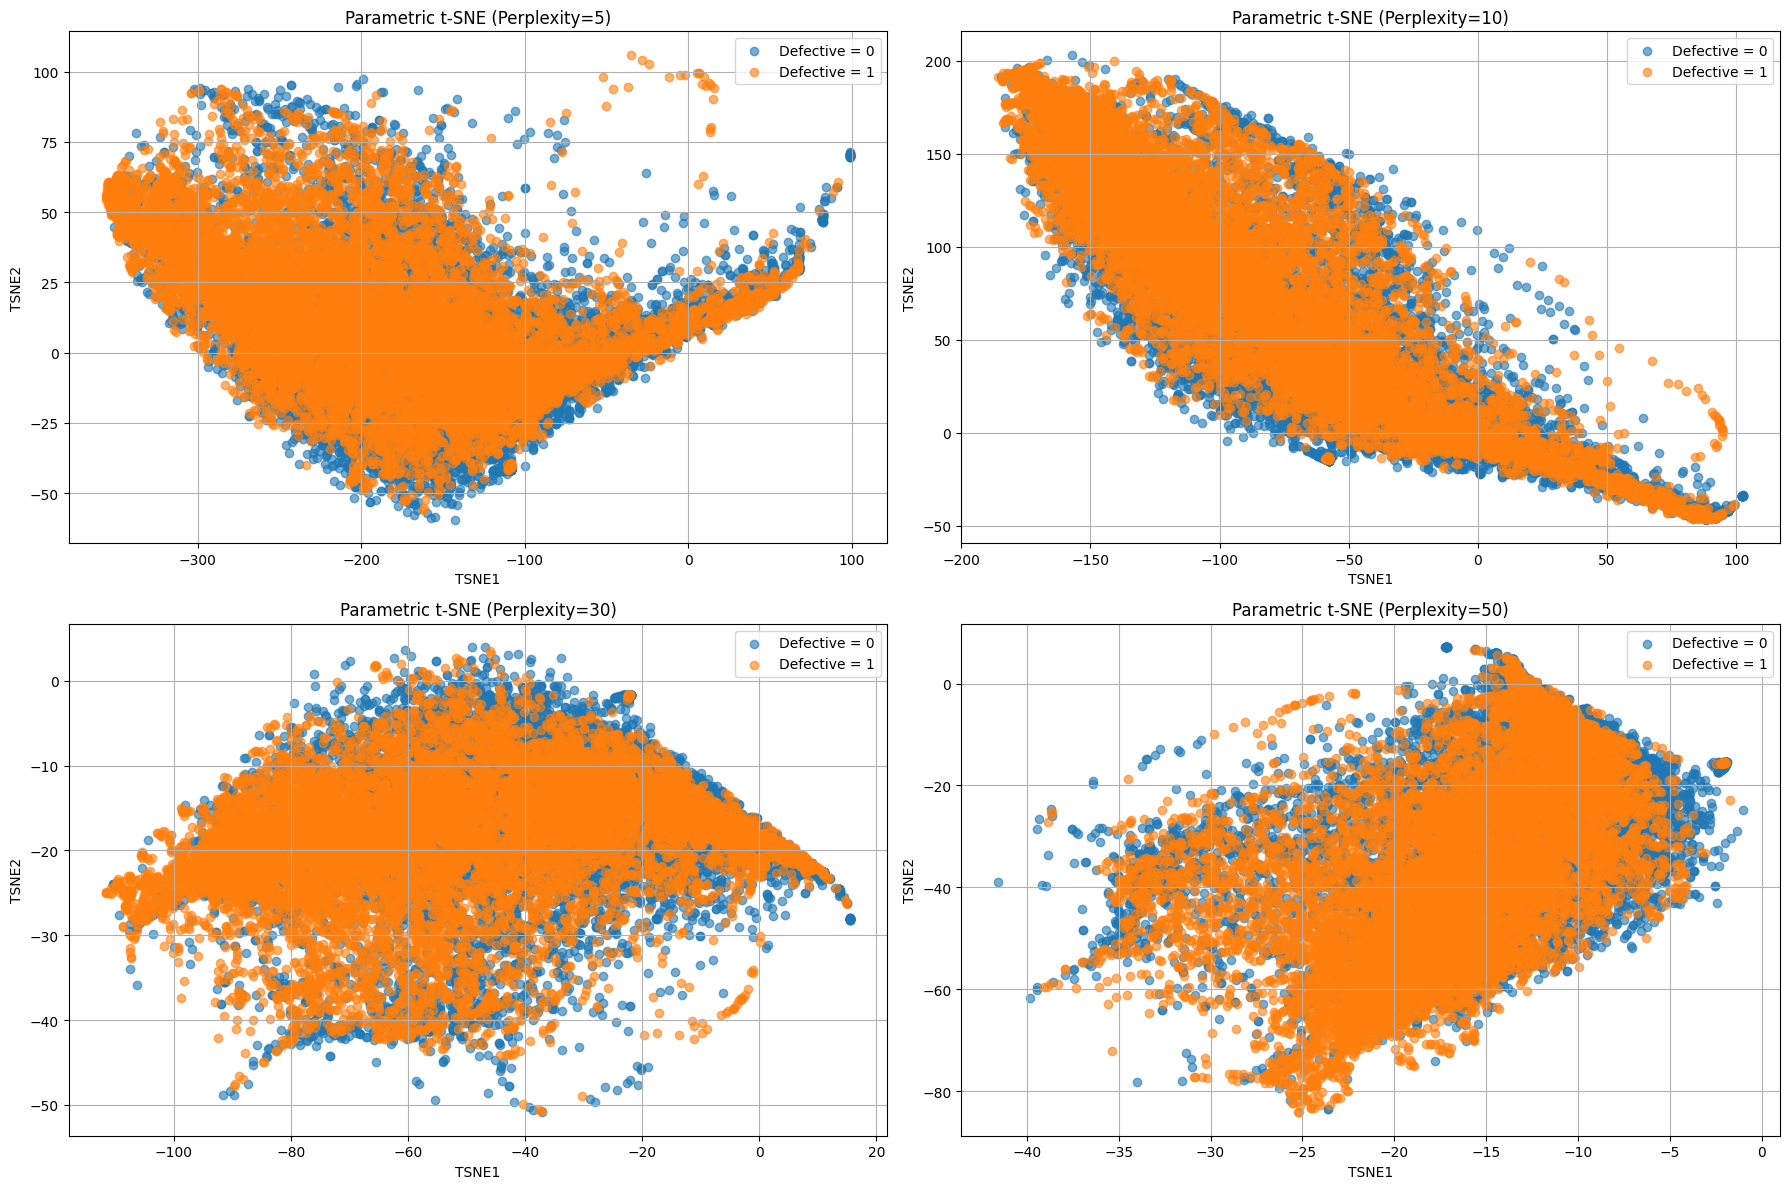

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from parametric_tSNE import Parametric_tSNE


# Daftar nilai perplexity yang ingin diuji
perplexities = [5, 10, 30, 50]

plt.figure(figsize=(18, 12))

# Simpan hasil coherence metrics
coherence_results = []

for i, perplexity in enumerate(perplexities, 1):
    print(f"\n▶️ Perplexity = {perplexity}")
    
    # 1️⃣ Fit parametric t-SNE ke seluruh data
    ptSNE = Parametric_tSNE(X_scaled.shape[1], 2, perplexity)
    ptSNE.fit(X_scaled)
    
    # 2️⃣ Transform data ke ruang embedding
    X_tsne = ptSNE.transform(X_scaled)

    # 3️⃣ Buat DataFrame untuk visualisasi
    tsne_df = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
    tsne_df["defective"] = y_scaled.values

    # 4️⃣ Plot
    plt.subplot(2, 2, i)
    for label in [0, 1]:
        subset = tsne_df[tsne_df["defective"] == label]
        plt.scatter(subset["TSNE1"], subset["TSNE2"], alpha=0.6, label=f"Defective = {label}")
    
    plt.title(f"Parametric t-SNE (Perplexity={perplexity})")
    plt.xlabel("TSNE1")
    plt.ylabel("TSNE2")
    plt.legend()
    plt.grid(True)
    
    # 5️⃣ Coherence evaluation: silhouette dan Davies-Bouldin
    silhouette = silhouette_score(X_tsne, y_scaled)
    db_index = davies_bouldin_score(X_tsne, y_scaled)
    
    print(f"  Silhouette Score : {silhouette:.4f}")
    print(f"  Davies-Bouldin Index : {db_index:.4f}")
    
    coherence_results.append({
        "Perplexity": perplexity,
        "Silhouette": silhouette,
        "Davies-Bouldin": db_index
    })

plt.tight_layout()
plt.show()




##### PCA + Classification

Single Learning and Ensemble Learning Imports

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

Model Train and Evaluation

In [23]:
models = { 
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),   # verbose=0 biar ga flooding di terminal
    "XGBoost": XGBClassifier(eval_metric="logloss")
}

results = []

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

    print(f"\n==== {name} ====")
    print(classification_report(y_test, y_pred))

# Simpan hasil ke DataFrame (optional)
import pandas as pd
df_results = pd.DataFrame(results)
print("\n✅ Hasil evaluasi:")
print(df_results)



==== Logistic Regression ====
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      2845
           1       0.68      0.57      0.62      2845

    accuracy                           0.65      5690
   macro avg       0.65      0.65      0.65      5690
weighted avg       0.65      0.65      0.65      5690


==== SVM ====
              precision    recall  f1-score   support

           0       0.65      0.75      0.70      2845
           1       0.70      0.60      0.65      2845

    accuracy                           0.67      5690
   macro avg       0.68      0.67      0.67      5690
weighted avg       0.68      0.67      0.67      5690


==== KNN ====
              precision    recall  f1-score   support

           0       0.83      0.66      0.74      2845
           1       0.72      0.86      0.79      2845

    accuracy                           0.76      5690
   macro avg       0.78      0.76      0.76      5690
weighted avg 

##### Parametric t-SNE + Classification 

Tuning Output Dimension dan Perplexity

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from parametric_tSNE import Parametric_tSNE

import pandas as pd

# 1️⃣ Split data train/test
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, stratify=y_scaled, random_state=42
)

# 2️⃣ Kombinasi output_dim & perplexity yang ringkas
param_combinations = [
    (2, 5),
    (5, 30)
]

results = []

for out_dim, perplexity in param_combinations:
    print(f"\n▶️ Parametric t-SNE | output_dim={out_dim} | perplexity={perplexity}")
    
    # Fit parametric t-SNE hanya di data train
    ptSNE = Parametric_tSNE(X_train_raw.shape[1], out_dim, perplexity)
    ptSNE.fit(X_train_raw)
    
    # Transform train & test
    X_train_tsne = ptSNE.transform(X_train_raw)
    X_test_tsne = ptSNE.transform(X_test_raw)
    
    # Random Forest
    model = RandomForestClassifier()
    model.fit(X_train_tsne, y_train)
    y_pred = model.predict(X_test_tsne)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Output Dim": out_dim,
        "Perplexity": perplexity,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })
    
    print(f"  Random Forest: acc={acc:.4f}, f1={f1:.4f}")

# 3️⃣ Konversi ke DataFrame & Simpan
df_results = pd.DataFrame(results)
print("\n✅ Tuning selesai! Hasil:")
print(df_results)



▶️ Parametric t-SNE | output_dim=2 | perplexity=5


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  Random Forest: acc=0.6634, f1=0.6639

▶️ Parametric t-SNE | output_dim=5 | perplexity=30


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  Random Forest: acc=0.7541, f1=0.7615

✅ Tuning selesai! Hasil:
   Output Dim  Perplexity  Accuracy  Precision    Recall  F1-Score
0           2           5  0.663445   0.663043  0.664675  0.663858
1           5          30  0.754130   0.739246  0.785237  0.761548


Classification (3 Single + 5 Ensemble)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from parametric_tSNE import Parametric_tSNE
import pandas as pd

# 1️⃣ Split data train/test (kalau belum)
# (Asumsi X_scaled & y_scaled sudah ada)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, stratify=y_scaled, random_state=42
)

# 2️⃣ Parametric t-SNE dengan output_dim=5 & perplexity=30
ptSNE = Parametric_tSNE(X_train_raw.shape[1], 5, 30)
ptSNE.fit(X_train_raw)

# Transform train & test
X_train_tsne = ptSNE.transform(X_train_raw)
X_test_tsne = ptSNE.transform(X_test_raw)

# 3️⃣ Model-model untuk klasifikasi final
models = { 
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}

results = []

# 4️⃣ Evaluasi semua model
for name, model in models.items():
    model.fit(X_train_tsne, y_train)
    y_pred = model.predict(X_test_tsne)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

    print(f"\n==== {name} (Parametric t-SNE) ====")
    print(classification_report(y_test, y_pred))

# 5️⃣ Simpan hasil ke DataFrame (opsional)
df_results = pd.DataFrame(results)
print("\n✅ Hasil evaluasi akhir (Parametric t-SNE output_dim=5, perplexity=30):")
print(df_results)

# (opsional) simpan ke CSV
# df_results.to_csv("parametric_tsne_final_8classifier.csv", index=False)


c:\Users\afilz\works\machine-learning\ta\venv310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


712/712 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

==== Logistic Regression (Parametric t-SNE) ====
              precision    recall  f1-score   support

           0       0.64      0.69      0.67      2845
           1       0.66      0.62      0.64      2845

    accuracy                           0.65      5690
   macro avg       0.65      0.65      0.65      5690
weighted avg       0.65      0.65      0.65      5690


==== SVM (Parametric t-SNE) ====
              precision    recall  f1-score   support

           0       0.65      0.68      0.67      2845
           1       0.67      0.64      0.65      2845

    accuracy                           0.66      5690
   macro avg       0.66      0.66      0.66      5690
weighted avg       0.66      0.66      0.66      5690


==== KNN (Parametric t-SNE) ====
              precision    recall  f1-score   support

           0       0.77      0.67      0.72      2845
           1       0.71      0.80    

##### Hyperparameter Tuning After PCA

Parameter Grids

In [29]:
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk setiap model
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 5, 10]
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.5, 1.0]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    },
    "CatBoost": {
        "iterations": [100, 200],
        "learning_rate": [0.03, 0.1],
        "depth": [3, 5, 7]
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5, 7]
    }
}



Lakukan GridsearchCV

In [30]:
from sklearn.model_selection import StratifiedKFold

results_pca_tuned = []

for name, model in models.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=StratifiedKFold(n_splits=5), scoring='f1', n_jobs=-1)
    grid.fit(X_train_pca, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_pca)

    results_pca_tuned.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

    print(f"\n==== {name} (Tuned) ====")
    print("Best Params:", grid.best_params_)
    print(classification_report(y_test, y_pred))


Tuning Logistic Regression...

==== Logistic Regression (Tuned) ====
Best Params: {'C': 0.01}
              precision    recall  f1-score   support

           0       0.63      0.72      0.67      2845
           1       0.68      0.58      0.62      2845

    accuracy                           0.65      5690
   macro avg       0.65      0.65      0.65      5690
weighted avg       0.65      0.65      0.65      5690

Tuning SVM...

==== SVM (Tuned) ====
Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.67      0.75      0.70      2845
           1       0.71      0.63      0.67      2845

    accuracy                           0.69      5690
   macro avg       0.69      0.69      0.69      5690
weighted avg       0.69      0.69      0.69      5690

Tuning KNN...

==== KNN (Tuned) ====
Best Params: {'n_neighbors': 3}
              precision    recall  f1-score   support

           0       0.86      0.69      0.76      28

Export to CSV

In [36]:
import pandas as pd

df_results_pca_tuned = pd.DataFrame(results_pca_tuned)
df_results_pca_tuned["Best Params"] = df_results_pca_tuned["Best Params"].apply(str)

# Simpan ke file CSV
df_results_pca_tuned.to_csv("general_pca.csv", index=False)
print("✅ Hasil evaluasi PCA telah disimpan ke 'general_pca.csv'")


✅ Hasil evaluasi PCA telah disimpan ke 'general_pca.csv'


##### Hyperparameter Tuning After t-SNE

In [37]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC

results_tsne_tuned = []

# Misal best_params_svm dari PCA
best_params_svm_pca = {
    "C": 10,
    "kernel": "rbf"
}

for name, model in models.items():
    if name == "SVM":
        print("\n▶️ Skip GridSearch for SVM. Use best param from PCA!")
        svm_model = SVC(**best_params_svm_pca)
        svm_model.fit(X_train_tsne, y_train)
        y_pred = svm_model.predict(X_test_tsne)
        
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        results_tsne_tuned.append({
            "Model": name,
            "Best Params": best_params_svm_pca,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1
        })
        
        print(f"\n==== {name} (parametric t-SNE + Best Param PCA) ====")
        print("Best Params:", best_params_svm_pca)
        print(classification_report(y_test, y_pred))
        continue

    print(f"\nTuning {name} (parametric t-SNE)...")
    
    grid = GridSearchCV(
        model, 
        param_grids[name],
        cv=StratifiedKFold(n_splits=5),
        scoring='f1',
        n_jobs=-1
    )
    grid.fit(X_train_tsne, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_tsne)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results_tsne_tuned.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })
    
    print(f"\n==== {name} (parametric t-SNE + Tuned) ====")
    print("Best Params:", grid.best_params_)
    print(classification_report(y_test, y_pred))

# 3️⃣ Simpan hasil tuning ke DataFrame (opsional)
import pandas as pd
df_results_tsne_tuned = pd.DataFrame(results_tsne_tuned)
print("\n✅ Hasil hyperparameter tuning (parametric t-SNE + SVM param PCA):")
print(df_results_tsne_tuned)



Tuning Logistic Regression (parametric t-SNE)...

==== Logistic Regression (parametric t-SNE + Tuned) ====
Best Params: {'C': 0.01}
              precision    recall  f1-score   support

           0       0.64      0.69      0.67      2845
           1       0.66      0.62      0.64      2845

    accuracy                           0.65      5690
   macro avg       0.65      0.65      0.65      5690
weighted avg       0.65      0.65      0.65      5690


▶️ Skip GridSearch for SVM. Use best param from PCA!

==== SVM (parametric t-SNE + Best Param PCA) ====
Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.66      0.67      0.67      2845
           1       0.67      0.65      0.66      2845

    accuracy                           0.66      5690
   macro avg       0.66      0.66      0.66      5690
weighted avg       0.66      0.66      0.66      5690


Tuning KNN (parametric t-SNE)...

==== KNN (parametric t-SNE + Tune

Export to CSV

In [38]:
# (opsional) simpan ke file CSV
df_results_tsne_tuned.to_csv("general_tsne.csv", index=False)